In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import joblib

In [3]:
data = pd.read_csv("/kaggle/input/housing-data/housing_data.csv")
data.head()

,Bedrooms,Bathrooms,SquareFootage,Location,SalePrice
0,3,2.0,1800,A,250000
1,4,3.0,2200,B,320000
2,2,1.0,1200,A,180000
3,3,2.5,2000,C,280000
4,4,2.5,2400,B,350000


In [4]:
data.columns

Index(['Bedrooms', ' Bathrooms', ' SquareFootage', ' Location', ' SalePrice'], dtype='object')

In [5]:
data.describe()

,Bedrooms,Bathrooms,SquareFootage,SalePrice
count,67.000000,67.000000,67.000000,67.000000
mean,2.820896,2.044776,1749.253731,253432.835821
std,0.936230,0.689375,504.937180,65007.044812
min,1.000000,1.000000,900.000000,150000.000000
25%,2.000000,1.500000,1200.000000,190000.000000
50%,3.000000,2.000000,1900.000000,260000.000000
75%,4.000000,2.500000,2200.000000,320000.000000
max,4.000000,3.000000,2400.000000,350000.000000


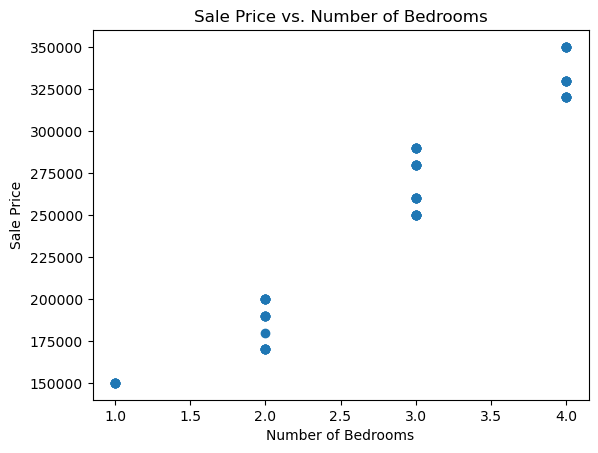

In [6]:
plt.scatter(data["Bedrooms"], data[' SalePrice'])

plt.title("Sale Price vs. Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Price")

plt.show()

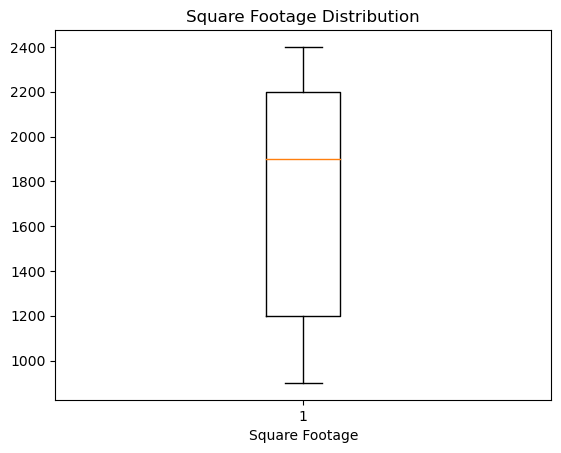

In [7]:
import matplotlib.pyplot as plt

# Create the box plot
plt.boxplot(data[' SquareFootage'])

# Add a title and labels to the axes
plt.title("Square Footage Distribution")
plt.xlabel("Square Footage")

# Show the plot
plt.show()

In [10]:
encoder = OneHotEncoder(sparse=False)
encoded_locations = encoder.fit_transform(data[[" Location"]])
locations_df = pd.DataFrame(encoded_locations, columns=encoder.categories_[0])
data_encoded = pd.concat([data.drop(" Location", axis=1), locations_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
data_encoded.head()

,Bedrooms,Bathrooms,SquareFootage,SalePrice,A,B,C
0,3,2.0,1800,250000,1.0,0.0,0.0
1,4,3.0,2200,320000,0.0,1.0,0.0
2,2,1.0,1200,180000,1.0,0.0,0.0
3,3,2.5,2000,280000,0.0,0.0,1.0
4,4,2.5,2400,350000,0.0,1.0,0.0


In [13]:
train_data = data_encoded.iloc[:50]
test_data = data_encoded.iloc[50:]  

In [17]:
X_train = train_data.drop(" SalePrice", axis=1)
y_train = train_data[" SalePrice"]

In [14]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
X_test = test_data.drop(" SalePrice", axis=1)
y_test = test_data[" SalePrice"]
y_pred = model.predict(X_test)

In [20]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 10959.501493321068


In [21]:
joblib.dump(model, "housing_price_model.pkl")

['housing_price_model.pkl']